1. 데이터 구조와 작업 과정에 대한 설명과 함께 K-평균 알고리즘 예제
2. 전체 과정을 설명하기 위한 코드 예제를 사용해 K-NN에 대한 설명
3. 샘플 집합에 있는 그룹의 최저 개수를 결정하기 위한 추가적인 방법


## 공통 중심점 찾기 :K평균 

1. 유클리드 거리
2. 체비셰프 거리
3. 맨해튼 거리:단위 사각형이 있는 도시의 한지점에서 다른 지점으로 이동하는 것과 같다

#### K-평균에서 사용하하는거리는 유클리드 거리이며, 이는 계산하기 쉽고 고차원에서도 잘적용되기 때문이다.
- 이방법의 목표는 : 샘플과 샘플을 포함하는 클러스터 중심과의 거리제곱의 합을 최소화 하는 것이다

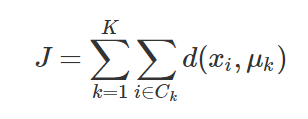

이는 목적함수가 거리가 최소가 될때까지 찾는 것을 의미함

세부 알고리즘은 다음과 같다.

1. 임의의 중심값  μk  를 고른다. 보통 데이터 샘플 중에서  K 개를 선택한다.
2. 중심에서 각 데이터까지의 거리를 계산
3. 각 데이터에서 가장 가까운 중심을 선택하여 클러스터 갱신
4. 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복한다.



#### K평균의 장/단점

- 가능한 클러스터 수를 알아야 한다
- 이상치 또한 다른 샘플과 같은 가중치를 가지므로 중심점 값을 왜곡할 수 있다
- 형태가 볼록(CONVEX) 하고 등방성(ISOTROPIC) 인것으로 가정하기 때문에 덩어리진 형태를 갖진 않는 클러스터에서는 잘 작동하지 않는다

##### K 평균 알고리즘 분해



In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
samples=np.array([[1,2],[12,2],[0,1],[10,0],[9,1],[8,2],[0,10],[1,8],[2,9],[9,9],[10,8],[8,9]], dtype=np.float)

In [22]:
centers=np.array([[3,2],[2,6],[9,3],[7,6]],dtype=np.float)
N=len(samples)

[]

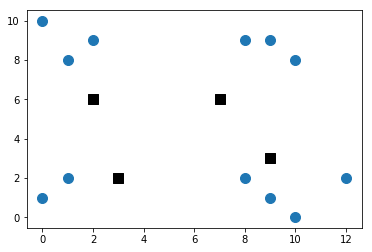

In [23]:
fig, ax=plt.subplots()
ax.scatter(samples.transpose()[0],samples.transpose()[1],marker="o",s=100)
ax.scatter(centers.transpose()[0],centers.transpose()[1],marker="s",s=100, color='black')
plt.plot()

새로운 샘플이 주어졌을때 , 이 샘플을 기존 중심점 하나에 할당하기 위해 이 샘플과 <br>
그 중심점들간의 거리 리스트를 반환하고 중심점을 재계산 하는 함수를 정의해보자!

In [46]:
def distance(samples,centroids):
    distances=np.zeros(len(centroids))
    for i in range(0,len(centroids)):
        dist=np.sqrt(sum(pow(np.subtract(samples,centroids[i]),2)))
        distances[i]=dist
    return distances

In [47]:
def showcurrentstatus(samples,centers,clusters,plotnumber):
    plt.subplot(620+plotnumber)
    plt.scatter(samples.transpose()[0],samples.transpose()[1],marker="o",s=150, c=clusters)
    plt.scatter(centers.transpose()[0],centers.transpose()[1],marker="s",s=100,color='black', c=clusters)
    plt.plot()

In [52]:
def kmeans(centroids,samples,K,plotresults):
    plt.figure(figsize=(20,20))
    distancs=np.zeros((N,K))
    new_centroids=np.zeros((N,K))
    final_centroids=np.zeros((K,2))
    clusters=np.zeros(len(samples),np.int)
    
    for i in range(0,len(samples)):
        distance[i]=distance(samples[i],centroids)
        clusters[i]=np.argmin(distances[i])
        new_centroids[clusters[i]]+=samples[i]
        divisor=np.bincount(clusters).astype(np.float)
        divisor.resize([K])
        for j in range(0,K):
            final_centroids[j]=np.nan_to_nan(np.divide(new_centroids[i]),divisors[j])
        if (i>3 and plotresults==True):
            showcurrentstatus(samples[:i],final_centroids,clusters[:i],i-3)
            
        return final_centroids
    
    
    

<strong>scikit-learn의 cluster 서브패키지는 KMeans 클러스터링을 위한 KMeans 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.</strong><br>

1. n_clusters: 클러스터의 갯수
2. init: 초기화 방법. "random"이면 무작위, "k-means++"이면 K-Means++ 방법. 또는 각 데이터의 클러스터 라벨.
3. n_init: 초기 중심값 시도 횟수. 디폴트는 10이고 10개의 무작위 중심값 목록 중 가장 좋은 값을 선택한다.
4. max_iter: 최대 반복 횟수.
5. random_state: 시드값.
6. 다음은 make_blobs 명령으로 만든 데이터를 2개로 K-means 클러스터링하는 과정을 나타낸 것이다. 마커(marker)의 모양은 클러스터를 나타내고 크기가 큰 마커가 중심값 위치이다. 각 단계에서 중심값은 전단계의 클러스터의 평균으로 다시 계산된다.

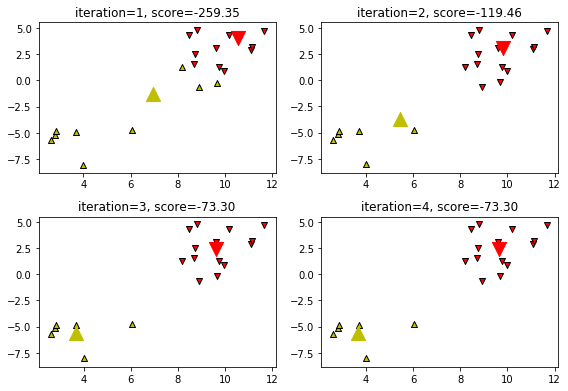

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=8).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()


## K-Means++¶
K-Means++ 알고리즘은 초기 중심값을 설정하기 위한 알고리즘이다. 다음과 같은 방법을 통해 되도록 멀리 떨어진 중심값 집합을 찾아낸다.

1. 중심값을 저장할 집합  M  준비
2. 일단 하나의 중심  μ0 를 랜덤하게 선택하여  M 에 넣는다.
3. M 에 속하지 않는 모든 샘플  xi 에 대해 거리  d(M,xi) 를 계산.  d(M,xi) 는  M 안의 모든 샘플  μk 에 대해  d(μk,xi) 를 계산하여 가장 작은 값 선택
4. d(M,xi) 에 비례한 확률로 다음 중심  μ 를 선택.
5. K 개의 중심을 선택할 때까지 반복
6. K-Means 알고리즘 사용

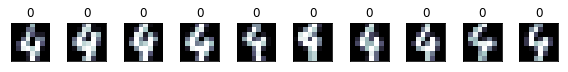

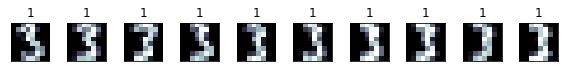

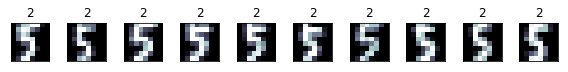

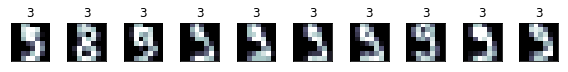

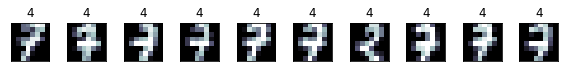

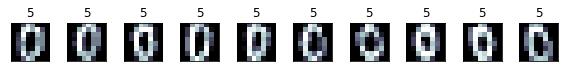

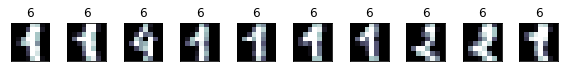

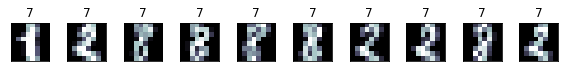

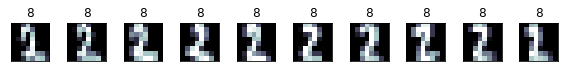

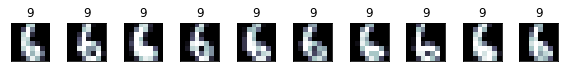

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

이미지와 번호가 아직은 일치하지 않는다

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]], dtype=int64)

In [31]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6686991223627669
AMI: 0.7397973157276612


C:\Users\hieun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Score: 0.18251916424600556


스케일링

scikit-learn에서는 다음과 같은 스케일링 클래스를 제공한다.

StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.<br>
RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환. <br>
MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환<br>
MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환<br>

In [3]:
X = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)  # -3부터 5까지의 분포
X = np.vstack([X, [100]])  # 아웃라이어(outlier) 값을 추가
pd.DataFrame(X).describe()

,0
count,10.000000
mean,10.900000
std,31.412842
min,-3.000000
25%,-0.750000
50%,1.500000
75%,3.750000
max,100.000000


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
np.mean(X_scaled), np.std(X_scaled)

(0.0, 1.0)